In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from sklearn.preprocessing import StandardScaler

#### read in train/test sets

In [8]:
df_train_sets = pd.read_pickle('ebw_poc_train_sample_expt3_with_shf_aligned_h1.pkl')
df_test_sets  = pd.read_pickle('ebw_poc_test_sample_expt3_with_shf_aligned_h1.pkl')

#### read in GBM model

In [9]:
file_gbm='best_est_gbm_h1_expt3_with_aligned_shf.pkl'
with open(file_gbm, 'rb') as file:
    best_estimators_gbm = pickle.load(file)

#### prereqs for SHAP value computation

In [12]:
import shap
from shap import Explainer

In [49]:
explainers = {}
shaps = {}
shap_weeks = [1, 4, 8, 13, 26]

for wk in shap_weeks:
    sv = best_estimators_gbm[wk]
    feature_names = sv.estimator.feature_names_in_
    feature_cols = df_train_sets.columns

    X_test = df_test_sets[df_test_sets.index.get_level_values(3) == wk]
    X_test = pd.get_dummies(X_test, columns=['market_name'])
    missing_cols = list(set(sv.estimator.feature_names_in_) - set(X_test.columns))
    print(missing_cols)
    for col in missing_cols:
        X_test[col] = 0
    test_idx = X_test[sv.estimator.feature_names_in_].dropna().index
    X_test = X_test.loc[test_idx]

    explainers[wk] = Explainer(sv.predict, masker=X_test[feature_names], feature_names=feature_names, max_evals=2500, algorithm='tree')
    shaps[wk] = explainers[wk](X_test[feature_names])

[]


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'function'>

In [25]:
import pickle
shap_file_name = 'ebw_shaps_expt3_with_shf_aligned_h1.pkl'
explainer_file_name = 'ebw_explainers_expt3_with_shf_aligned_h1.pkl'

with open(shap_file_name, 'wb') as file:
    pickle.dump(shaps, file)

# with open(explainer_file_name, 'wb') as file:
#     pickle.dump(explainers, file)

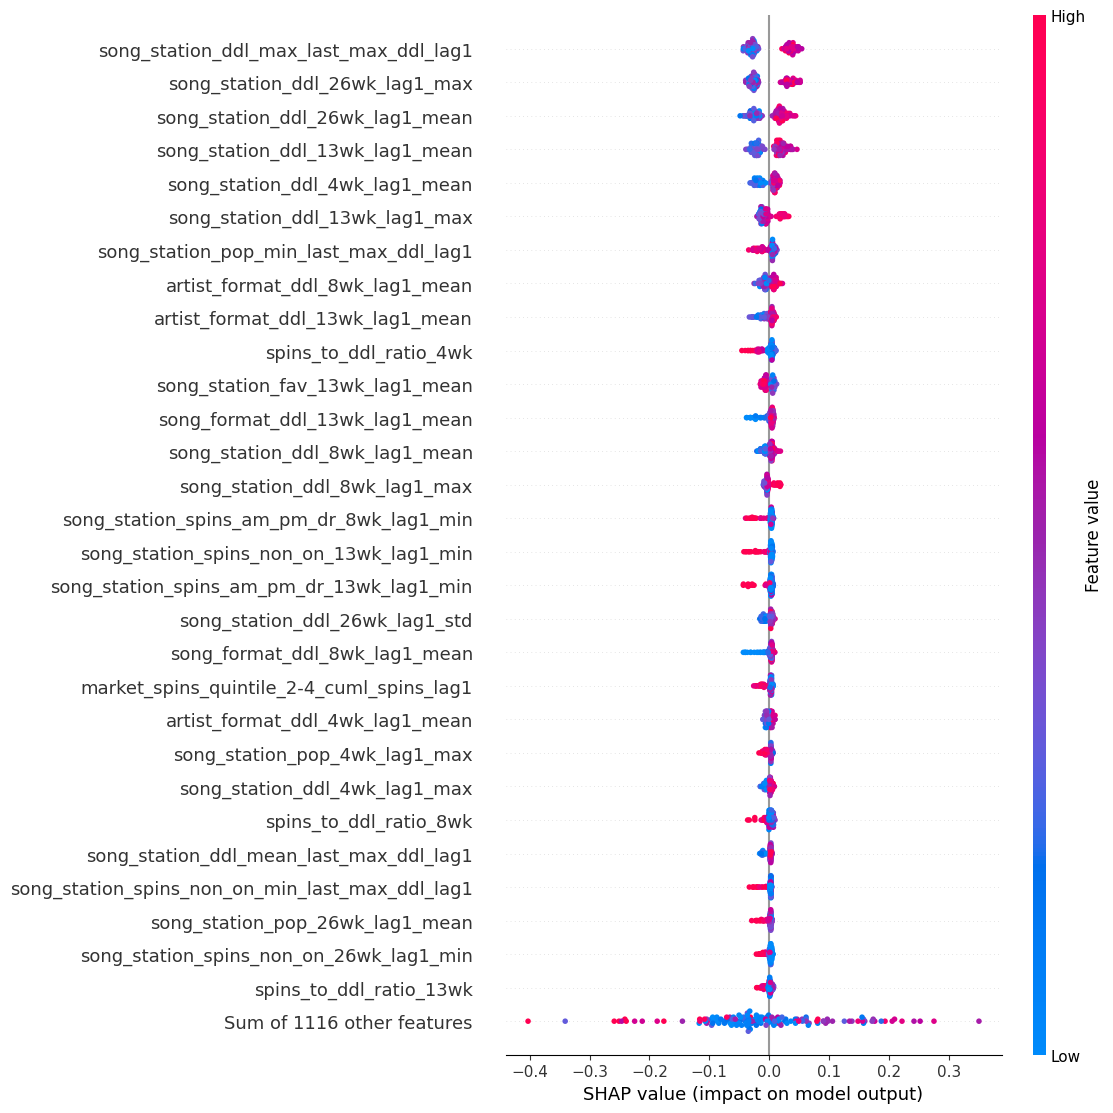

In [42]:
from shap.plots import beeswarm
beeswarm(shaps[26], max_display=30)

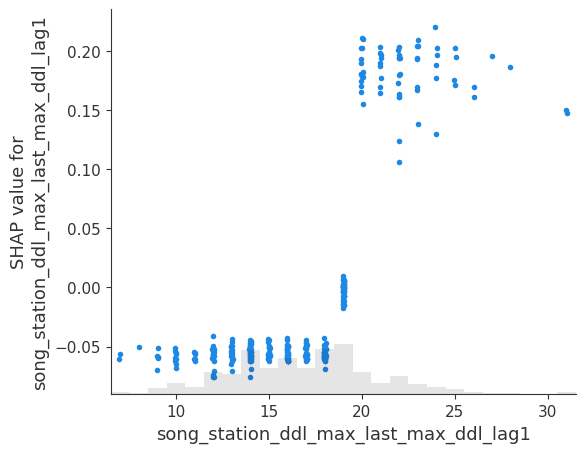

In [48]:
shap.plots.scatter(shaps[8][:, "song_station_ddl_max_last_max_ddl_lag1"])